<a href="https://colab.research.google.com/github/kp2899990/komal-prasad-saini/blob/main/imbd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import urlopen as uReq
from bs4 import BeautifulSoup as soup
import requests

In [18]:
df = pd.read_csv('IMDB-Movie-Data.csv')

Display top 10 rows of Dataset

In [19]:
df.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


check last 10 rows of dataset


In [ ]:
df.tail(10)

3. Find Shape of Our Dataset (Number of Rows And Number of Columns)

In [20]:
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 1000
Number of Columns: 12


4.Getting Information About Our Dataset Like Total Number Rows, Total Number of Columns, datatypes of Each Column And Memory Requirement

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


5.Check Missing Values In The Dataset

In [22]:
print("Any Missing Value?", df.isnull().values.any())

Any Missing Value? True


In [23]:
df.isnull().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


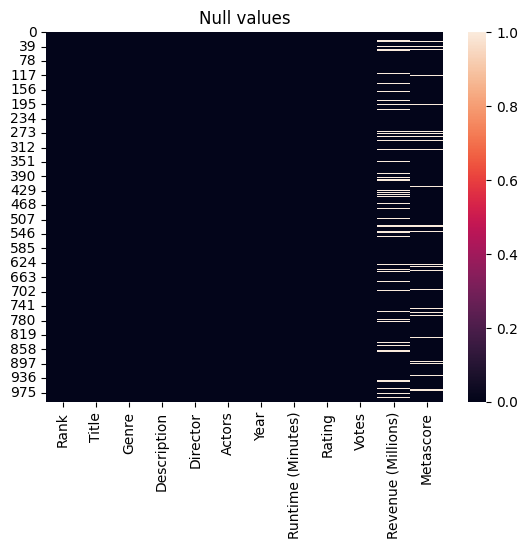

In [24]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

In [25]:
per_missing = df.isnull().sum()*100/len(df)
per_missing

,0
Rank,0.0
Title,0.0
Genre,0.0
Description,0.0
Director,0.0
Actors,0.0
Year,0.0
Runtime (Minutes),0.0
Rating,0.0
Votes,0.0



6.Drop All The Missing Values

In [26]:
df.dropna(axis=0)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
993,994,Resident Evil: Afterlife,"Action,Adventure,Horror",While still out to destroy the evil Umbrella C...,Paul W.S. Anderson,"Milla Jovovich, Ali Larter, Wentworth Miller,K...",2010,97,5.9,140900,60.13,37.0
994,995,Project X,Comedy,3 high school seniors throw a birthday party t...,Nima Nourizadeh,"Thomas Mann, Oliver Cooper, Jonathan Daniel Br...",2012,88,6.7,164088,54.72,48.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0


In [27]:
df.isnull().sum()

,0
Rank,0
Title,0
Genre,0
Description,0
Director,0
Actors,0
Year,0
Runtime (Minutes),0
Rating,0
Votes,0


7. Check For Duplicate Data

In [28]:
dup_data=df.duplicated().any()
print("Are there any duplicate values?", dup_data)

Are there any duplicate values? False



8.Get Overall Statistics About The DataFrame

In [29]:
df.describe(include='all')

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000,1000,1000,1000,1000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
unique,NaN,999,207,1000,644,996,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,The Host,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,Ridley Scott,"Jennifer Lawrence, Josh Hutcherson, Liam Hemsw...",NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,2,50,1,8,2,NaN,NaN,NaN,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,NaN,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,NaN,NaN,NaN,NaN,NaN,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,NaN,NaN,NaN,NaN,NaN,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,NaN,NaN,NaN,NaN,NaN,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,NaN,NaN,NaN,NaN,NaN,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,NaN,NaN,NaN,NaN,NaN,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000


9. Display Title of The Movie Having Runtime>=180 Minutes

In [30]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [31]:
runtime= df[df['Runtime (Minutes)']>= 180 ]['Title']
print('Title of the movie having runtime >=180 miniuts :', runtime)

Title of the movie having runtime >=180 miniuts : 82     The Wolf of Wall Street
88           The Hateful Eight
311             La vie d'Adèle
828                 Grindhouse
965              Inland Empire
Name: Title, dtype: object


10. In Which Year There Was The Highest Average Voting?

In [32]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [33]:
df.groupby('Year')['Votes'].mean().sort_values(ascending=False)

,Votes
Year,
2012,285226.093750
2008,275505.384615
2006,269289.954545
2009,255780.647059
2010,252782.316667
2007,244331.037736
2011,240790.301587
2013,219049.648352
2014,203930.224490


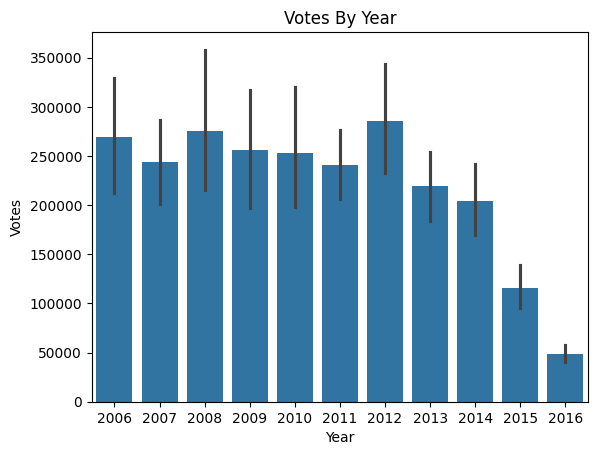

In [34]:
sns.barplot(x='Year',y='Votes',data=df)
plt.title('Votes By Year')
plt.show()

In [35]:
highest_avg_voting= df.groupby('Year')['Votes'].mean().sort_values(ascending=False).head(1)
print("The Highest average voting year is :",highest_avg_voting)

The Highest average voting year is : Year
2012    285226.09375
Name: Votes, dtype: float64


11. In Which Year There Was The Highest Average Revenue?

In [36]:
df.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False)

,Revenue (Millions)
Year,
2009,112.601277
2012,107.973281
2010,105.081579
2008,99.082745
2007,87.882245
2011,87.612258
2013,87.121818
2006,86.296667
2014,85.078723


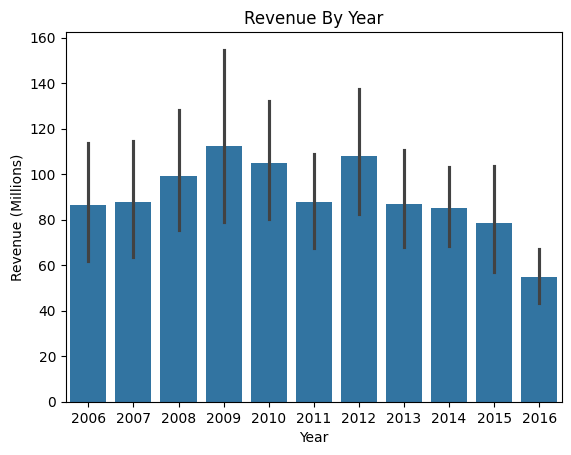

In [37]:
sns.barplot(x='Year',y='Revenue (Millions)',data=df)
plt.title('Revenue By Year')
plt.show ()

In [38]:
Highest_avg_revenue =df.groupby('Year')['Revenue (Millions)'].mean().sort_values(ascending=False).head(1)
print("The highest average revenue year is :",Highest_avg_revenue)

The highest average revenue year is : Year
2009    112.601277
Name: Revenue (Millions), dtype: float64


12. Find The Avarage Rating For Each Director

In [39]:
df.groupby('Director')['Rating'].mean().sort_values(ascending=False)

,Rating
Director,
Nitesh Tiwari,8.80
Christopher Nolan,8.68
Olivier Nakache,8.60
Makoto Shinkai,8.60
Aamir Khan,8.50
...,...
Micheal Bafaro,3.50
Jonathan Holbrook,3.20
Shawn Burkett,2.70


13. Display top 10 Lengthy Movies Title and Runtime

In [40]:
Top10_len = df.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']].set_index('Title')

In [41]:
Top10_len

,Runtime (Minutes)
Title,
Grindhouse,191
The Hateful Eight,187
The Wolf of Wall Street,180
La vie d'Adèle,180
Inland Empire,180
Cloud Atlas,172
3 Idiots,170
Interstellar,169
Pirates of the Caribbean: At World's End,169


<Axes: xlabel='Runtime (Minutes)', ylabel='Title'>

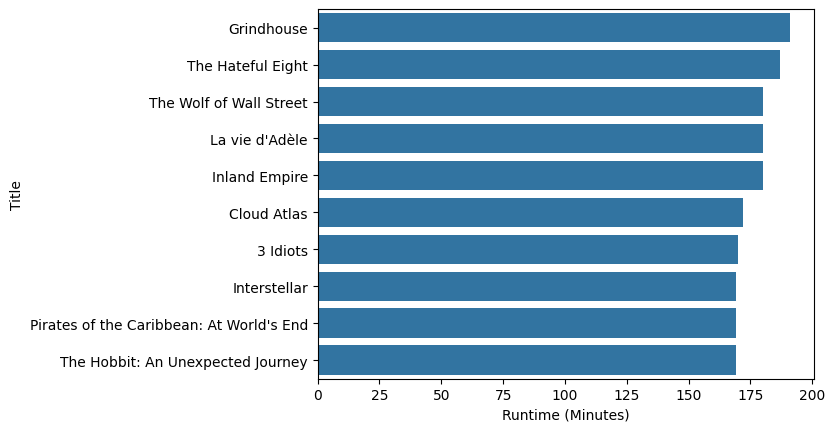

In [42]:
sns.barplot(x='Runtime (Minutes)', y=Top10_len.index, data = Top10_len)

14.Display Number of Movies Per Year

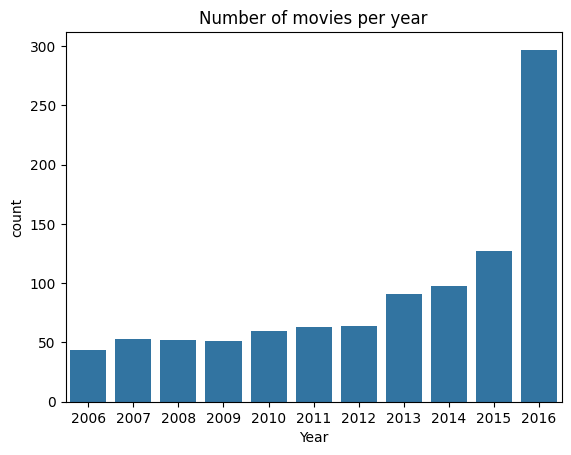

In [43]:
df['Year'].value_counts()
sns.countplot(x='Year',data= df)
plt.title('Number of movies per year')
plt.show()

15. Find Most Popular Movie Title (Higest Revenue)



In [44]:
df[df['Revenue (Millions)'].max()==df['Revenue (Millions)']]['Title']
most_pop = df[df['Revenue (Millions)'].max()==df['Revenue (Millions)']]['Title']
print("Most Popular Movie Title As Per Heghest Revenue is " ,df[df['Revenue (Millions)'].max()==df['Revenue (Millions)']]['Title'])

Most Popular Movie Title As Per Heghest Revenue is  50    Star Wars: Episode VII - The Force Awakens
Name: Title, dtype: object


16. Display Top 10 Highest Rated Movie Titles and its Directors

In [45]:
Top_n_rating= df.nlargest(10,'Rating')[['Title','Rating','Director']].set_index('Title')
Top_n_rating

,Rating,Director
Title,,
The Dark Knight,9.0,Christopher Nolan
Inception,8.8,Christopher Nolan
Dangal,8.8,Nitesh Tiwari
Interstellar,8.6,Christopher Nolan
Kimi no na wa,8.6,Makoto Shinkai
The Intouchables,8.6,Olivier Nakache
The Prestige,8.5,Christopher Nolan
The Departed,8.5,Martin Scorsese
The Dark Knight Rises,8.5,Christopher Nolan


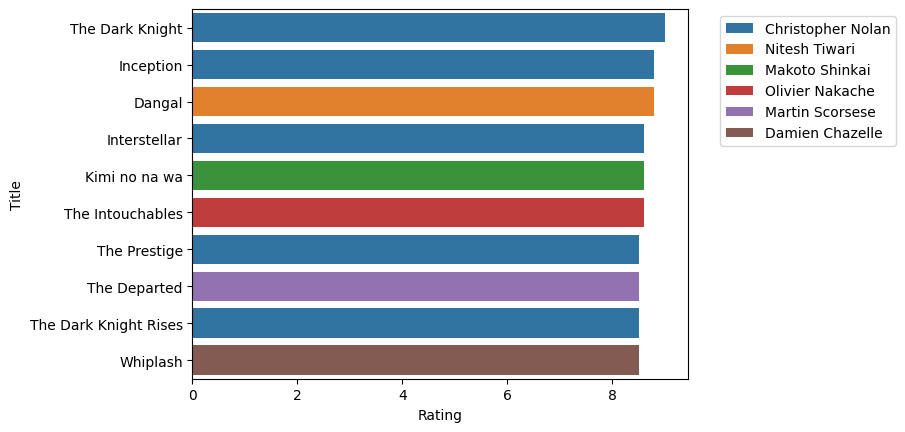

In [46]:
sns.barplot(x='Rating',y=Top_n_rating.index,data=Top_n_rating,hue='Director')
plt.legend( bbox_to_anchor=(1.05,1),loc=2 )
plt.show()


17.Display Top 10 Highest Revenue Movie titles

In [47]:
Top10_revenue= df.nlargest(10,'Revenue (Millions)')[['Title','Revenue (Millions)']].set_index('Title')
Top10_revenue

,Revenue (Millions)
Title,
Star Wars: Episode VII - The Force Awakens,936.63
Avatar,760.51
Jurassic World,652.18
The Avengers,623.28
The Dark Knight,533.32
Rogue One,532.17
Finding Dory,486.29
Avengers: Age of Ultron,458.99
The Dark Knight Rises,448.13


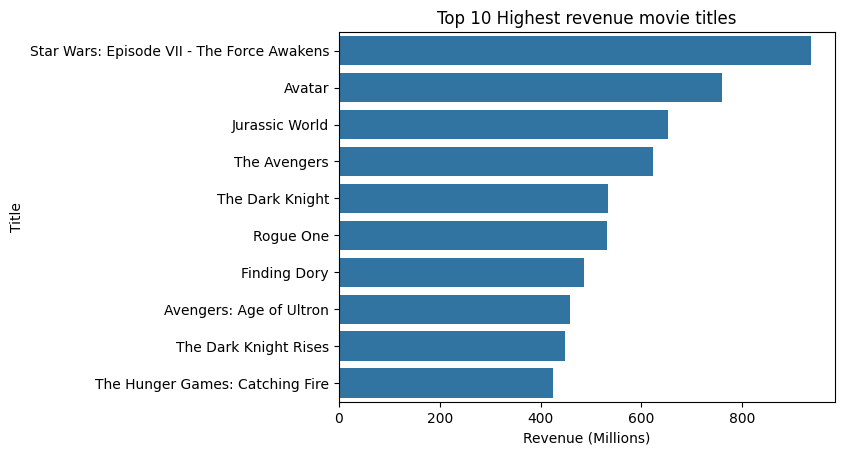

In [48]:
sns.barplot(x='Revenue (Millions)',y=Top10_revenue.index,data=Top10_revenue)
plt.title('Top 10 Highest revenue movie titles')
plt.show()

18. Find Avarage Rating Of Movies Year Wise

In [49]:
df.groupby('Year')['Rating'].mean().sort_values(ascending=False)

,Rating
Year,
2007,7.133962
2006,7.125000
2009,6.960784
2012,6.925000
2011,6.838095
2014,6.837755
2010,6.826667
2013,6.812088
2008,6.784615


19. Dose Rating Affect The Revenue?

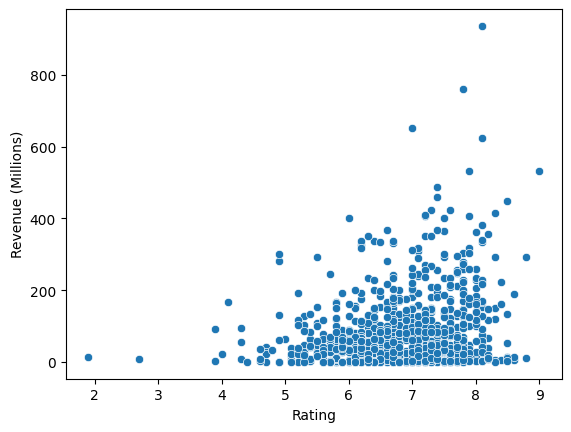

In [50]:
sns.scatterplot(x='Rating',y='Revenue (Millions)',data=df)
plt.show()


20. Classify Movies Based on Ratings[Excellent,Good and Average]

In [51]:
def rating(rating):
    if rating>=7.0:
        return "Excellent"
    elif rating>=6.0:
        return "Good"
    else:
        return "Average"

In [53]:
df["Rating_category"]=df['Rating'].apply(rating)
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Rating_category
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0,Excellent
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0,Excellent
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0,Excellent
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0,Excellent
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0,Good


21. Count Number of Action Movies

In [54]:
Number_of_action_Movies= df['Genre'].str.contains('Action',case=False).sum()
print("Action movies count is",Number_of_action_Movies)

Action movies count is 303


22. Find The Unique Values From Genre

In [55]:
df['Genre']

,Genre
0,"Action,Adventure,Sci-Fi"
1,"Adventure,Mystery,Sci-Fi"
2,"Horror,Thriller"
3,"Animation,Comedy,Family"
4,"Action,Adventure,Fantasy"
...,...
995,"Crime,Drama,Mystery"
996,Horror
997,"Drama,Music,Romance"
998,"Adventure,Comedy"


In [56]:
list1=[]
for value in df['Genre']:
    list1.append(value.split(',')) #making 2d list seperated by coma
one_d=[]
for item in list1:
    for item1 in item:
        one_d.append(item1) #converting 2d list in 1d list
uni_list=[]
for item in one_d:
    if item not in uni_list:
        uni_list.append(item)  #removing duplicate value
print("The unique values from the genre is ", uni_list)

The unique values from the genre is  ['Action', 'Adventure', 'Sci-Fi', 'Mystery', 'Horror', 'Thriller', 'Animation', 'Comedy', 'Family', 'Fantasy', 'Drama', 'Music', 'Biography', 'Romance', 'History', 'Crime', 'Western', 'War', 'Musical', 'Sport']


23. How Many Films of Each Genre were Made?

In [57]:
one_d=[]
for item in list1:
    for item1 in item:
        one_d.append(item1)


In [58]:
from collections import Counter
Counter(one_d)

Counter({'Action': 303,
         'Adventure': 259,
         'Sci-Fi': 120,
         'Mystery': 106,
         'Horror': 119,
         'Thriller': 195,
         'Animation': 49,
         'Comedy': 279,
         'Family': 51,
         'Fantasy': 101,
         'Drama': 513,
         'Music': 16,
         'Biography': 81,
         'Romance': 141,
         'History': 29,
         'Crime': 150,
         'Western': 7,
         'War': 13,
         'Musical': 5,
         'Sport': 18})